<a href="https://colab.research.google.com/github/Aman-Bhatt-0/Automated-Tumor-Detection/blob/main/LUNG_TUMOR_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d hamdallak/the-iqothnccd-lung-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset
License(s): CC0-1.0
 92% 137M/149M [00:01<00:00, 89.9MB/s]
100% 149M/149M [00:01<00:00, 95.1MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/the-iqothnccd-lung-cancer-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
dir = '/content/The IQ-OTHNCCD lung cancer dataset'
img_width = 256
img_height = 256

In [ ]:
# Second section of the path
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [ ]:
random.shuffle(img_data)

In [ ]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)

#Convert X and Y list into array
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [ ]:
print(X[19])

[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]]


In [ ]:
for i in range(len(X)):
    X[i] = X[i]/255.0
X.shape

(1097, 256, 256, 3)

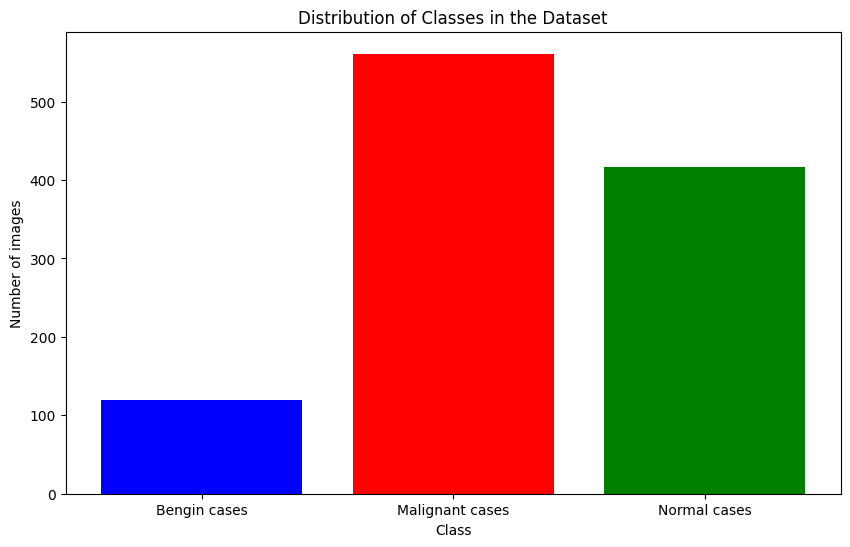

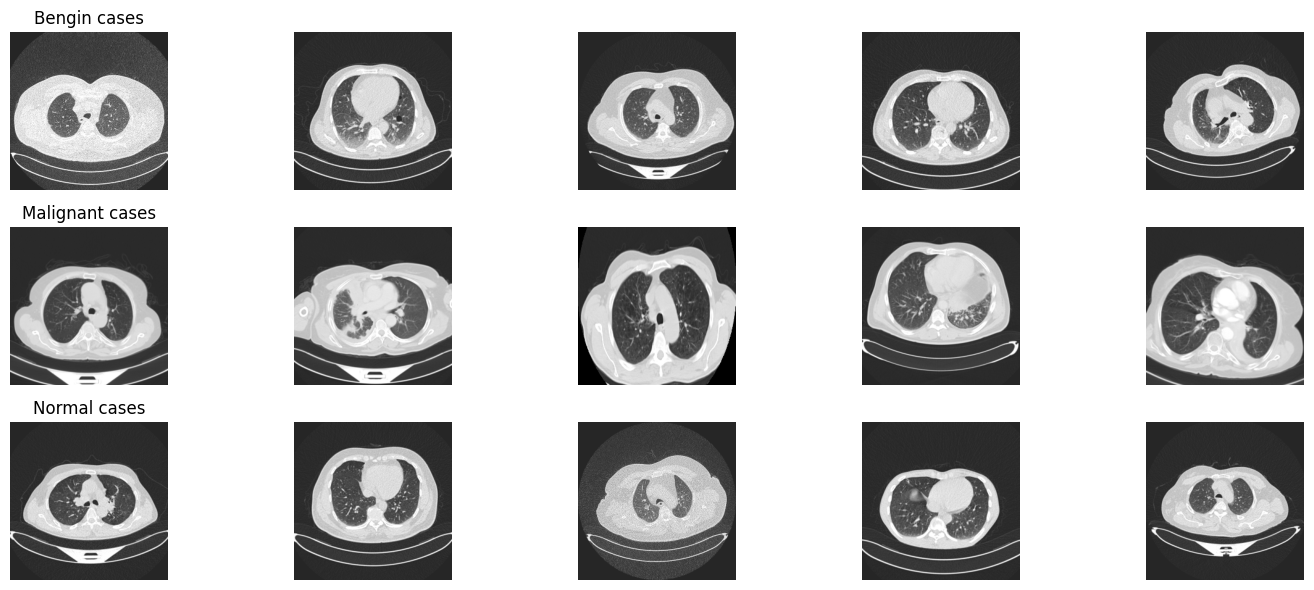

In [ ]:

# Plotting the distribution of classes in the dataset
def plot_class_distribution(labels, categories):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color=['blue', 'red', 'green'])
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.title('Distribution of Classes in the Dataset')
    plt.show()

plot_class_distribution(Y, categories)

# Plotting some more samples from each category
def display_sample_images_from_each_category(dir, categories, num_samples=5):
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 6))
    for i, category in enumerate(categories):
        folder = os.path.join(dir, category)
        img_files = os.listdir(folder)[:num_samples]
        for j, img_file in enumerate(img_files):
            img_path = os.path.join(folder, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_height, img_width))
            axes[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category)
    plt.tight_layout()
    plt.show()

display_sample_images_from_each_category(dir, categories)


In [ ]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = X.shape[1: ], activation = 'relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2, seed = 12))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Save the model
model.save("lung_cancer_detection_model.h5")
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("lung_cancer_detection_model.h5")
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3000)                │      49,155,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1500)                │       4,501,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           4,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,365,643 (207.39 MB)

 Trainable params: 54,365,643 (207.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 15)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5471 - loss: 2.0929 - val_accuracy: 0.4716 - val_loss: 0.9638
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.5268 - loss: 0.9648 - val_accuracy: 0.4716 - val_loss: 0.9638
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.5492 - loss: 0.9184 - val_accuracy: 0.5852 - val_loss: 0.8554
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.6260 - loss: 0.8117 - val_accuracy: 0.6932 - val_loss: 0.6845
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.7407 - loss: 0.6893 - val_accuracy: 0.7614 - val_loss: 0.5723
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.7593 - loss: 0.5296 - val_accuracy: 0.7898 - val_loss: 0.5907
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.8335 - loss: 0.4340 - val_accuracy: 0.8466 - val_loss: 0.3880
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.8643 - loss: 0.3175 - val_accuracy:

In [ ]:
result = model.predict(x_test)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 889ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step - accuracy: 0.9910 - loss: 0.0656
Test Loss: 0.14135262370109558
Test Accuracy: 0.9818181991577148


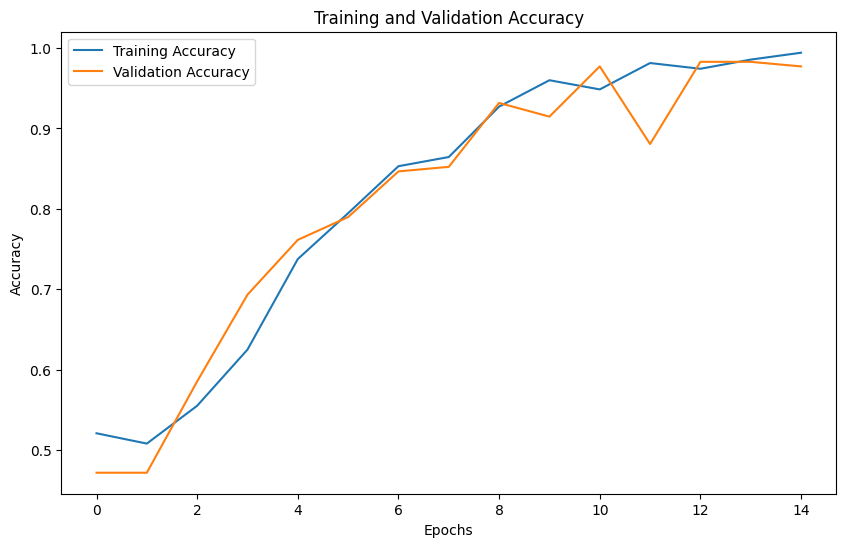

In [ ]:

# Plotting training and validation accuracy over epochs
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Assuming you have a 'history' object from model training
plot_training_history(history)


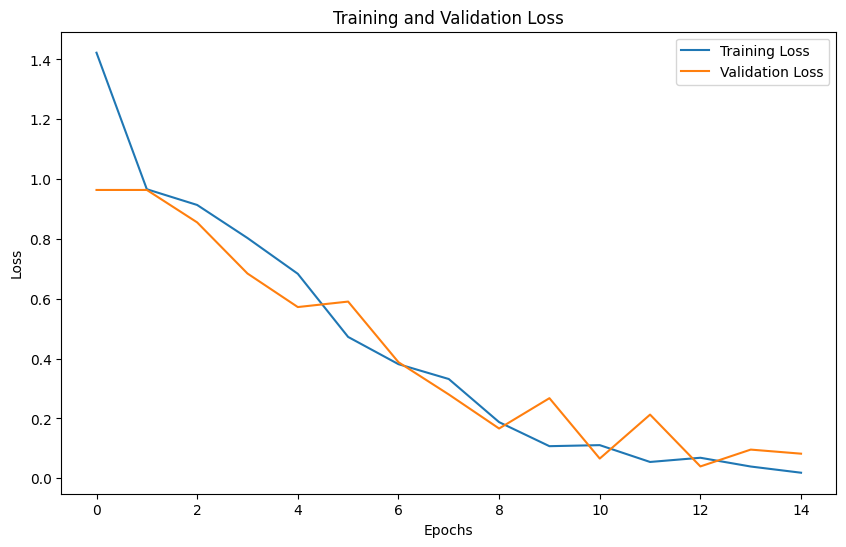

In [ ]:

# Plotting training and validation accuracy over epochs
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Assuming you have a 'history' object from model training
plot_training_history(history)

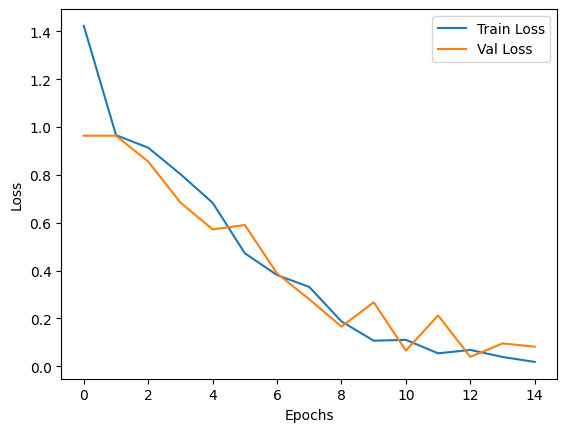

In [ ]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

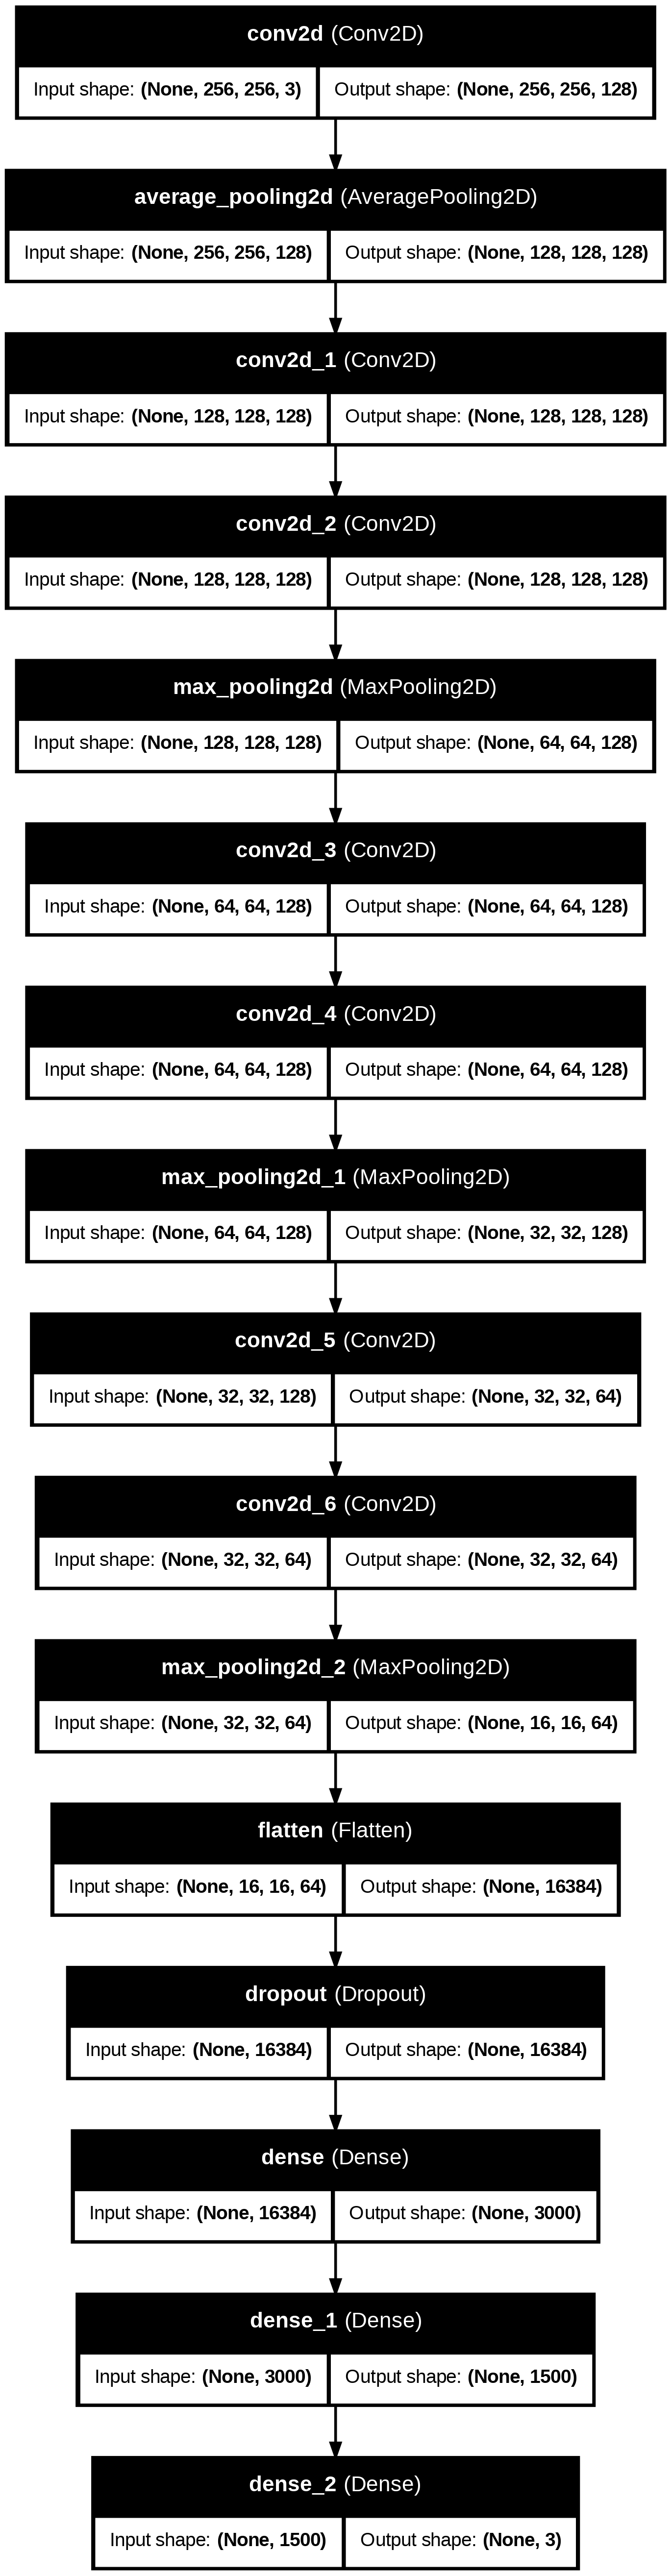

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

1/1 [==============================] - 0s 184ms/step
Predicted Class Label: 0
Confidence: 1.0
Predicted Category: Benign


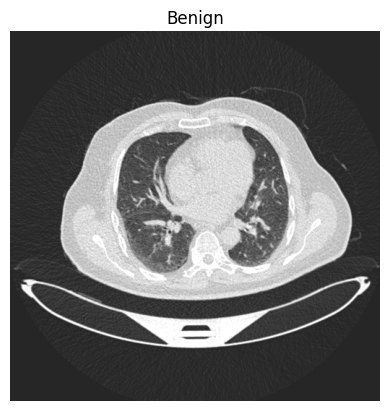

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/content/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg'
img = cv2.imread(image_path)

img = cv2.resize(img, (img_height, img_width))

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

7/7 [==============================] - 0s 67ms/step


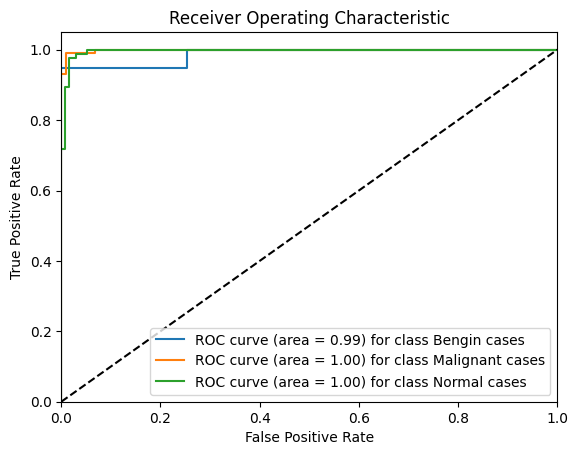

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = tf.keras.utils.to_categorical(y_test, num_classes=len(categories))

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict(x_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], model.predict(x_test)[:, i])

# Plot of a ROC curve for a specific class
plt.figure()
for i in range(len(categories)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {categories[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
